⚠️ This project is mandatory for certification bloc #2.

![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating with Tinder

## Company's description 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests.

Tinder was launched by Sean Rad at a hackathon held at the Hatch Labs incubator in West Hollywood in 2012.

As of 2021, Tinder has recorded more than 65 billion matches worldwide.

📌 Objectives

The study aimed to understand what truly matters in speed dating and whether self-perceptions align with real outcomes. We explored:

What participants say they want in a partner vs. what actually leads to a match

The importance of shared interests vs. shared race

Whether people can predict their perceived value

The effect of meeting order

The impact of going out habits and personal interests


### What makes people match? 

In [206]:

import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 📂 Data Loading & Initial Exploration

In [207]:
df = pd.read_csv('/Users/wafazeghouane/Desktop/Data_science_Full stack/Final projects/Tinder /Speed+Dating+Data.csv', encoding= 'latin1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [208]:
pd.set_option("display.max_columns", None)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

📋 VARIABLES DESCRIPTION

gender: Gender of self (female = 0, male = 1)

age: Age of self

age_o: Age of partner

d_age: Difference in age

race: Race of self

race_o: Race of partner

samerace: Whether the two persons have the same race or not

imprace: How important is it that partner is of same race

imprelig: How important is it that partner has same religion

field: Field of study

pf_o_att: How important does partner rate attractiveness

pf_o_sinc: How important does partner rate sincerity

pf_o_int: How important does partner rate intelligence

pf_o_fun: How important does partner rate being funny

pf_o_amb: How important does partner rate ambition

pf_o_sha: How important does partner rate having shared interests

attr_o: Rating by partner at night of event on attractiveness

sinc_o: Rating by partner at night of event on sincerity

intel_o: Rating by partner at night of event on intelligence

fun_o: Rating by partner at night of event on being funny

amb_o: Rating by partner at night of event on being ambitious

shar_o: Rating by partner at night of event on shared interests

attractive_important: What do you look for in a partner - attractiveness

sincere_important: What do you look for in a partner - sincerity

intellicence_important: What do you look for in a partner - intelligence

funny_important: What do you look for in a partner - being funny

ambtition_important: What do you look for in a partner - ambition

shared_interests_important: What do you look for in a partner - shared interests

attr: Rate yourself - attractiveness

sinc: Rate yourself - sincerity

intel: Rate yourself - intelligence

fun: Rate yourself - being funny

amb: Rate yourself - ambition

attractive_partner: Rate your partner - attractiveness

sincere_partner: Rate your partner - sincerity

intelligence_partner: Rate your partner - intelligence

funny_partner: Rate your partner - being funny

ambition_partner: Rate your partner - ambition

shared_interests_partner: Rate your partner - shared interests

sports: Your own interest in playing sports [1-10]

tvsports: Your interest in watching sports [1-10]

exercise: Your interest in exercising [1-10]

dining: Your interest in dining out [1-10]

museums: Your interest in visiting museums/galleries [1-10]

art: Your interest in art [1-10]

hiking: Your interest in hiking/camping [1-10]

gaming: Your interest in gaming [1-10]

clubbing: Your interest in dancing/clubbing [1-10]

reading: Your interest in reading [1-10]

tv: Your interest in watching TV [1-10]

theater: Your interest in theater [1-10]

movies: Your interest in movies [1-10]

concerts: Your interest in going to concerts [1-10]

music: Your interest in music [1-10]

shopping: Your interest in shopping [1-10]

yoga: Your interest in yoga/meditation [1-10]

int_corr: Correlation between participant’s and partner’s interests

expected_happy_with_sd_people: How happy you expect to be with people you meet at the event

expected_num_interested_in_me: How many people you expect will be interested in dating you

expected_num_matches: How many matches you expect to get

like: Did you like your partner?

guess_prob_liked: How likely you think it is that your partner liked you

met: Whether you had met your partner before

dec: Your decision (yes/no) at the night of the event

dec_o: Partner’s decision (yes/no) at the night of the event

match: Whether it was a mutual match

📋 ADDITIONAL TECHNICAL VARIABLES

iid: Unique ID for each participant across all waves

id: ID of the participant within their wave (local, not unique globally)

pid: Partner’s iid (the person they dated during that row)

idg: Subject number within gender and group (example: first male, second male...)

wave: Unique ID of the speed dating session (evening event)

condtn: Condition of the experiment (1 = limited choice, 2 = extensive choice)

round: Number of total people participant met during that event (if round = 10 → 10 potential partners)

position: Station/table number where the participant met this particular partner

order: The order in which the participant met this partner (e.g., 1st person they met, 2nd, etc.)

dec: Decision made by the participant to see the partner again (1 = Yes, 0 = No)

dec_o: Decision made by the partner toward the participant (1 = Yes, 0 = No)

match: Whether there was a mutual match (1 = Yes, 0 = No)

Row meaning: Each row represents one speed date between two people





In [209]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [210]:
# number of the perspn who participate to the experience & number of session

#nb_participants = df["idg"].unique()[:].tolist()# personne/sexe
nb_participants = df.groupby('iid')['iid'].unique().count()
nb_campagnes = df.groupby('wave')['wave'].unique().count()
print(f"Number of participant = {nb_participants}")
print(f"Number of  campagnes = {nb_campagnes}")
nb_participants = len(df['iid'].unique())
nb_campagnes = len(df['wave'].unique())

print("Number of participants = {} et nombre de sessions = {}".format(nb_participants,nb_campagnes))

Number of participant = 551
Number of  campagnes = 21
Number of participants = 551 et nombre de sessions = 21


In [211]:
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

## 🧹 Data Cleaning

In [212]:
# Check for missing values

print(df.isnull().sum())

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


In [213]:
df.fillna(0, inplace=True)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,0,0,0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,0,0,0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,0,0,0,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0,1,1,1,10,7,0.0,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0

In [214]:
# remplace the values with keys. 

mapping_race = {1: "Black/African American", 2: "European/Caucasuan-American", 3: "Latino/Hispanic American", 4: "Asian/Pacific Islander/Asian-American", 5:"Native American", 6: "Other"}
df[['race_o', 'race']] = df[['race_o', 'race']].replace(mapping_race)
df.head()



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,1,11.0,0,0.14,0,27.0,European/Caucasuan-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,2,12.0,0,0.54,0,22.0,European/Caucasuan-American,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,3,13.0,1,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [215]:
goal_map = {1: "Seemed like a fun night out", 2: "To meet new people", 3: "To get a date", 4: "Looking for a serious relationship", 5:"To say I did it", 6: "Other"}
df[['goal']] = df[['goal']].replace(goal_map)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,1,11.0,0,0.14,0,27.0,European/Caucasuan-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,2,12.0,0,0.54,0,22.0,European/Caucasuan-American,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,3,13.0,1,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,7.0,1.0,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0

In [216]:
mapping_date = {1: "Several times a week", 2: "Twice a week", 3: "Once a week", 4: "Twice a month", 5: "Several times a year", 6:"Several times a year", 7:'Almost never'}
df[['date']] = df[['date']].replace(mapping_date)
mapping_go_out = {1: "Several times a week", 2: "Twice a week", 3: "Once a week", 4: "Twice a month", 5: "Several times a year", 6:"Several times a year"}
df[['go_out']] = df[['go_out']].replace(mapping_go_out)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,0.0,4,1,11.0,0,0.14,0,27.0,European/Caucasuan-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0,1,1,1,10,7,0.0,3,2,12.0,0,0.54,0,22.0,European/Caucasuan-American,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0,1,1,1,10,7,0.0,10,3,13.0,1,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,0,0,0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.44,16.67,13.89,22.22,11.11,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,8.0

In [217]:
df = df[df['career_c'] != 0.0]
df = df[df['career_c'] != '0.0']


In [218]:
count = df['career_c'].value_counts() # Step 2: count careers (after cleaning)
count


career_c
2.0     2320
7.0     2170
6.0      724
1.0      675
9.0      547
4.0      421
10.0     379
3.0      261
5.0      234
11.0     220
13.0      81
15.0      77
16.0      44
8.0       39
12.0      28
14.0      10
17.0      10
Name: count, dtype: int64

In [219]:
career_map = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Finance/Business',
    8: 'Real Estate',
    9: 'International Affairs',
    10: 'Undecided'
}

df['career_c'] = df['career_c'].map(career_map)

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
30,4,4.0,0,7,1,1,10,6,0.0,3,1,11.0,0,-0.18,1,27.0,European/Caucasuan-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,0,0,0,European/Caucasuan-American,1.0,1.0,Texas,"77,096","37,754.00",Seemed like a fun night out,Several times a year,Several times a week,lawyer/policy work,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,13.79,20.69,27.59,10.34,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0
31,4,4.0,0,7,1,1,10,6,0.0,2,2,12.0,0,-0.18,1,22.0,European/Caucasuan-American,60.0,0.0,0.0,40.0,0.0,0.0,0,6.0,5.0,10.0,6.0,6.0,5.0,6.0,3.0,1.0,23.0,Law,1.0,0,0,0,European/Caucasuan-American,1.0,1.0,Texas,"77,096","37,754.00",Seemed like a fun night out,Several times a year,Several times a week,lawyer/policy work,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0,8.0,7.0,8.0,10.0,7.0,8.0,8.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,13.79,20.69,27.59,10.34,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,7.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0
32,4,4.0,0,7,1,1,10,6,0.0,9,3,13.0,0,0.05,0,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,23.0,Law,1.0,0,0,0,European/Caucasuan-American,1.0,1.0,Texas,"77,096","37,754.00",Seemed like a fun night out,Several times a year,Several times a week,lawyer/policy work,Lawyer,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0,4.0,7.0,8.0,8.0,6.0,7.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,13.79,20.69,27.59,10.34,3.45,0

In [220]:
df['career_c'].value_counts()


career_c
Academic/Research              2320
Banking/Finance/Business       2170
Creative Arts/Entertainment     724
Lawyer                          675
International Affairs           547
Doctor/Medicine                 421
Undecided                       379
Psychologist                    261
Engineer                        234
Real Estate                      39
Name: count, dtype: int64

## 📊 Exploratory Data Analysis (EDA)


Before diving into the analysis, we aim to understand the main factors influencing matches in speed dating events.
We'll explore goals,career, field, preferences...

📌 1. Participants' Primary Goals

In [221]:
# What are the goals of men and women when they attend the speed dating event?


# the gender column
# 0 = Female, 1 = Male
gender_map = {0: 'Women', 1: 'Men'}

# apply a mapping to a gender 


df['gender_label'] = df['gender'].map(gender_map)
#Now df has a new column gender_label with 'Women' and 'Men' instead of 0/1



In [222]:
print(df['goal'].unique())

['Seemed like a fun night out' 'To meet new people' 'To get a date'
 'Looking for a serious relationship' 'Other' 'To say I did it']


In [223]:
df = df[df['goal'] != 0.0]


In [224]:

# Count how many men/women chose each goal
goal_counts = df.groupby(['gender_label', 'goal']).size()

print(goal_counts)

gender_label  goal                              
Men           Looking for a serious relationship     172
              Other                                  230
              Seemed like a fun night out           1739
              To get a date                          434
              To meet new people                    1346
              To say I did it                        234
Women         Looking for a serious relationship     129
              Other                                  179
              Seemed like a fun night out           1677
              To get a date                          197
              To meet new people                    1627
              To say I did it                        276
dtype: int64


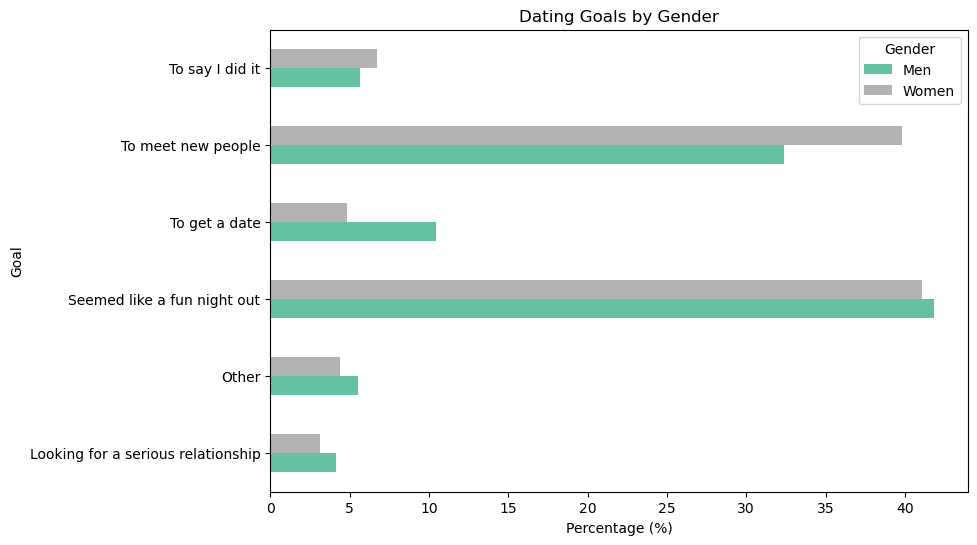

In [225]:
import matplotlib.pyplot as plt

# Count of each goal per gender
goal_counts = df.groupby(['gender_label', 'goal']).size().unstack()

# Convert raw counts to percentages
goal_percent = goal_counts.div(goal_counts.sum(axis=1), axis=0) * 100
#.div(..., axis=0) → divide each value in the row by the row total

# Plot as a horizontal bar chart
goal_percent.T.plot(kind='barh', figsize=(9,6), colormap='Set2')
plt.title("Dating Goals by Gender")
plt.xlabel("Percentage (%)")
plt.ylabel("Goal")
plt.legend(title='Gender')
#plt.tight_layout()
plt.show()

#.T = transpose the table (rows become columns, and vice versa)
#.plot.barh() = make a horizontal bar chart


Most men and women came to meet new people or just to enjoy a fun night. Few were specifically looking for a serious relationship.

📌 2. Race and Demographic Backgrounds

In [226]:
# The main race : 
# pourcentage of race for each men and women
# the match of the same race 

# Count how many participants are from each race
participant_race_counts = df['race'].value_counts()
participant_race_counts


race
European/Caucasuan-American              4691
Asian/Pacific Islander/Asian-American    1953
Latino/Hispanic American                  664
Other                                     522
Black/African American                    410
Name: count, dtype: int64

In [227]:
df = df[df['race_o'] != 0.0]

In [228]:
partner_race_counts = df['race_o'].value_counts()
partner_race_counts

race_o
European/Caucasuan-American              4637
Asian/Pacific Islander/Asian-American    1951
Latino/Hispanic American                  652
Other                                     515
Black/African American                    412
Name: count, dtype: int64

In [229]:
# Calculate percentages
race_pct_by_gender = df.groupby('gender_label')['race'].value_counts(normalize=True).unstack().fillna(0) * 100
race_pct_by_gender


race,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasuan-American,Latino/Hispanic American,Other
gender_label,,,,,
Men,22.135544,4.314968,60.702097,6.240858,6.606533
Women,25.313653,5.633456,53.161132,9.864699,6.027060


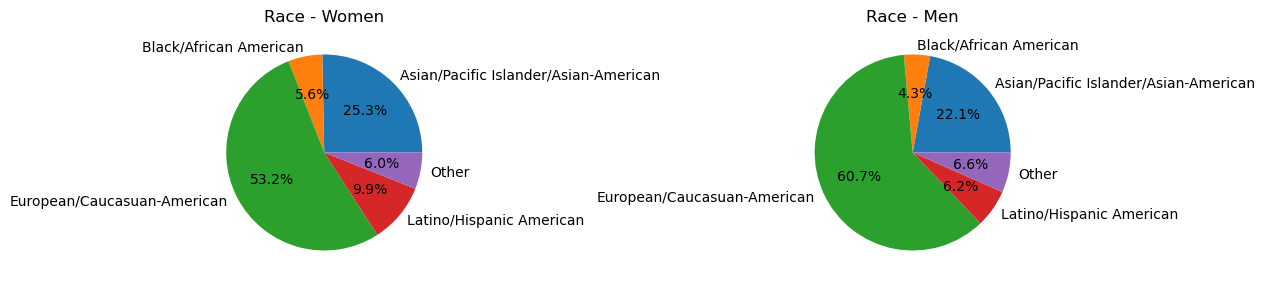

In [230]:
import matplotlib.pyplot as plt

# Race of participants 
race_pct = df.groupby('gender_label')['race'].value_counts(normalize=True).unstack() * 100

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Women
axes[0].pie(race_pct.loc['Women'], labels=race_pct.columns, autopct='%1.1f%%')
axes[0].set_title("Race - Women")

# Men
axes[1].pie(race_pct.loc['Men'], labels=race_pct.columns, autopct='%1.1f%%')
axes[1].set_title("Race - Men")

plt.tight_layout()
plt.show()


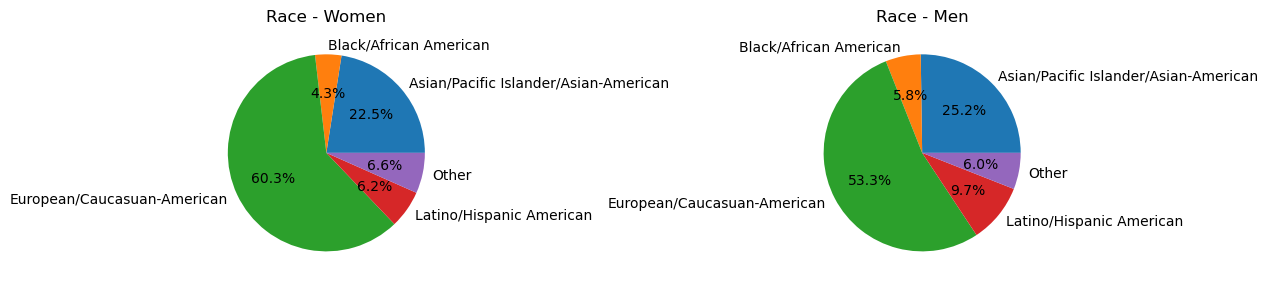

In [231]:

# Race of parteners 
partner_race_pct = df.groupby('gender_label')['race_o'].value_counts(normalize=True).unstack() * 100

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Women
axes[0].pie(partner_race_pct.loc['Women'], labels=partner_race_pct.columns, autopct='%1.1f%%')
axes[0].set_title("Race - Women")

# Men
axes[1].pie(partner_race_pct.loc['Men'], labels=partner_race_pct.columns, autopct='%1.1f%%')
axes[1].set_title("Race - Men")

plt.tight_layout()
plt.show()

European/Caucasian-American participants make up the largest racial group for both genders, whereas Black/African-American participants are the least represented for both participants and parteners. 

In [232]:
# Group by participant race and partner race, then calculate match rate
race_match_matrix = df.groupby(['race', 'race_o'])['match'].mean().unstack().fillna(0) * 100
race_match_matrix


race_o,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasuan-American,Latino/Hispanic American,Other
race,,,,,
Asian/Pacific Islander/Asian-American,12.842105,17.821782,13.059701,12.179487,17.293233
Black/African American,18.181818,55.555556,17.167382,20.000000,42.857143
European/Caucasuan-American,13.087558,17.372881,17.605634,18.282548,18.819188
Latino/Hispanic American,12.578616,20.000000,18.181818,23.076923,33.333333
Other,17.293233,40.909091,18.819188,33.333333,9.523810


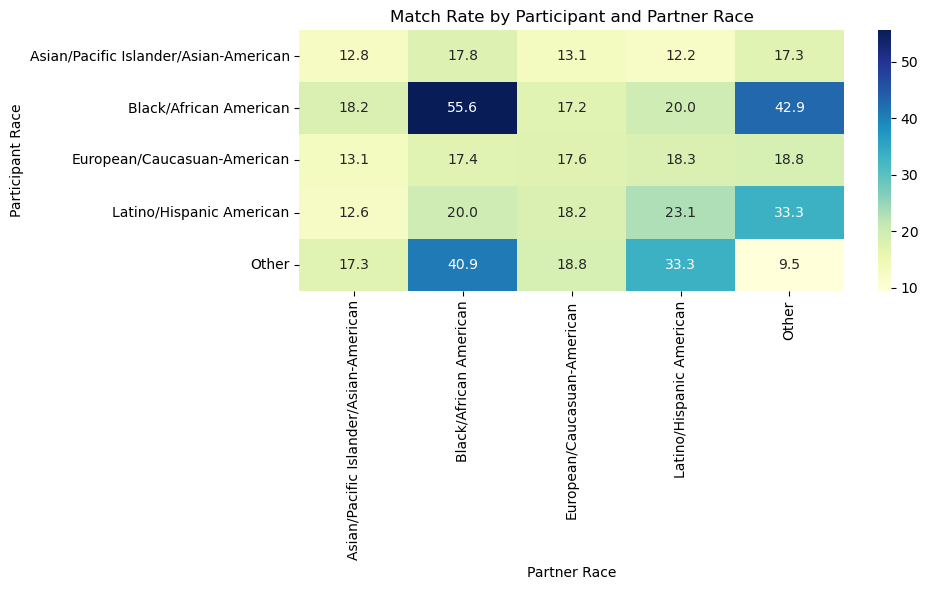

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(race_match_matrix, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Match Rate by Participant and Partner Race")
plt.xlabel("Partner Race")
plt.ylabel("Participant Race")
plt.tight_layout()
plt.show()


- when both the participant and their partner are Black, there’s a very high match rate (55.56%).
- Some racial groups (especially Black participants) show strong preference for same-race partners.
- For others, race doesn't seem to make a big difference in match success.
- Cultural familiarity, comfort, or shared background might influence some groups more than others.

mean ≈ 3.66	On average, people don't find religious similarity very important
25% = 1, 50% = 3	Half of participants rated this 3 or below (very low importance)
75% = 6	Only the top 25% rated it 6 or more
max = 10 Some people still find it extremely important

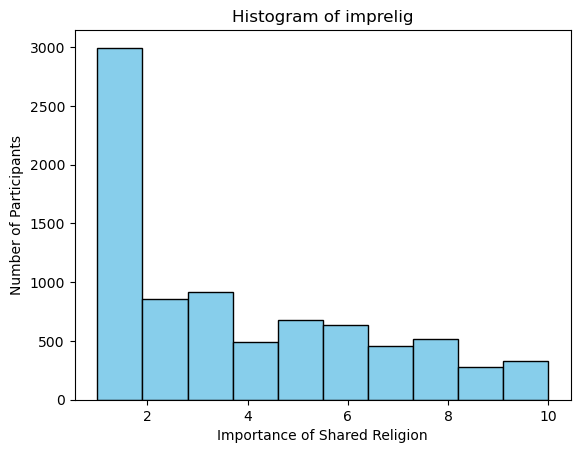

In [234]:

# Plotting a basic histogram    
plt.hist(df['imprelig'], bins=10, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Importance of Shared Religion')
plt.ylabel('Number of Participants')
plt.title('Histogram of imprelig')

# Display the plot
plt.show()


Sharing the same religion is not important when choosing a partner

In [235]:
#We includ gender to see if men and women differ in how important it is for their partner to share the same religion.

imprelig_gender = df.groupby('gender_label')['imprelig'].mean()
print(imprelig_gender)


gender_label
Men      3.089469
Women    4.220664
Name: imprelig, dtype: float64


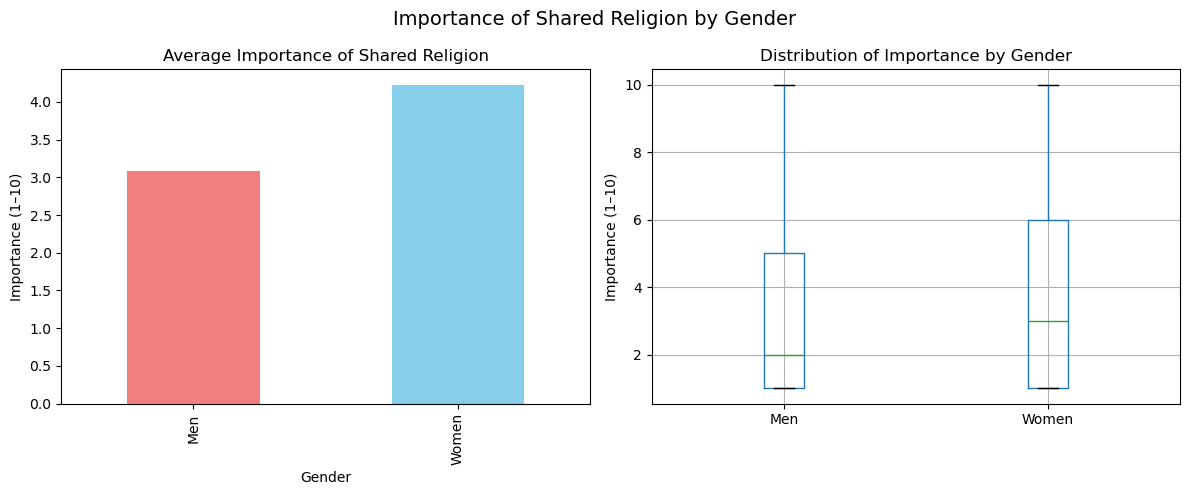

In [236]:

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Bar plot of average imprelig by gender
df.groupby('gender_label')['imprelig'].mean().plot(kind='bar', ax=axes[0], color=['lightcoral', 'skyblue'])

# Customize the bar plot
axes[0].set_title("Average Importance of Shared Religion")
axes[0].set_ylabel("Importance (1–10)")
axes[0].set_xlabel("Gender")

df.boxplot(column='imprelig', by='gender_label', ax=axes[1])
axes[1].set_title("Distribution of Importance by Gender")
axes[1].set_ylabel("Importance (1–10)")
axes[1].set_xlabel("")
plt.suptitle("Importance of Shared Religion by Gender", fontsize=14)
plt.tight_layout()




We notice that women place more importance on sharing the same religion with their partner than men do

## Part 2: What Participants Value vs What Matters in Reality

Participants were asked to rate the importance of different attributes in a partner.  
We compare this with how well their matched partners were actually rated on those same attributes.

📌 1. What Participants Value in a Partner

In [237]:
# What do you look for in the opposite sex ?

df1 = df.groupby("gender_label")[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()

# Rename the columns 
cols = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Shared Interests"]
df1.columns = cols

# Reset the index so that 'gender' becomes a normal column
df1 = df1.reset_index()

# Show the result
df1




,gender_label,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,Men,26.877979,16.500059,19.531248,17.703369,8.499476,11.005783
1,Women,17.960590,18.337063,20.976954,17.149958,12.871412,12.677321


In [238]:
#Spider chart :

if 'Men' in df1['gender_label'].values and 'Women' in df1['gender_label'].values:
    # Data for Men and Women
    male_values = df1[df1['gender_label'] == 'Men'].iloc[0, 1:].values
    female_values = df1[df1['gender_label'] == 'Women'].iloc[0, 1:].values
    categories = df1.columns[1:]

    # Create radar chart
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=male_values, theta=categories, fill='toself', name='Men'))
    fig.add_trace(go.Scatterpolar(r=female_values, theta=categories, fill='toself', name='Women'))

    fig.update_layout(
        title="What participants are looking for in the opposite sex?",
        showlegend=True,
        width=600,  
        height=500  
    )
    fig.show()




- Men prioritize Attractiveness more than any other attribute, with a higher value in that category.
- Women, on the other hand, place more importance on Intelligence, as reflected by the larger value in that category compared to men

In [239]:
#What participants think that the opposite sex looks for in a date? 
df2 = df.groupby("gender_label")[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean()
cols = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Shared Interests"]
df2.columns = cols
df2 = df2.reset_index()
df2

,gender_label,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,Men,24.987362,15.256680,16.215826,18.111960,14.236665,11.104588
1,Women,35.603737,11.368399,12.507894,18.670536,9.295542,12.735815


In [240]:

categories = df2.columns[1:] 
male_values = df2.loc[df2['gender_label'] == 'Men', categories].values.flatten()
female_values = df2.loc[df2['gender_label'] == 'Women', categories].values.flatten()

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=male_values, theta=categories, fill='toself', name='Men'))
fig.add_trace(go.Scatterpolar(r=female_values, theta=categories, fill='toself', name='Women'))

fig.update_layout(
    title="What participants think that the opposite sex looks for in a date?",
    showlegend=True,
    width=600,
    height=500
)

fig.show()


For both men and women, attractiveness is ranked as the most important trait when considering what the opposite sex values in a partner.
Fun is consistently ranked second for both genders.
However, while men prioritize intelligence as their third most valued trait, women place equal importance on intelligence and shared interests.

In [241]:
# Plot a bar chart to visualize priorities side-by-side (Men vs Women)
#melt() transforms a wide table into a long table.
fig = px.bar(df2.melt(id_vars='gender_label', var_name='Attribute', value_name='Importance'),
             x='Attribute', y='Importance', color='gender_label', barmode='group',
             text_auto='.2s',  # <<< THIS adds value labels!
             color_discrete_map={'Men': 'royalblue', 'Women': 'darkorange'},
             title='Importance of Attributes by Gender', width=800,
    height=500)

fig.show()

📌 2. Self-Perception vs How Others See You

In [242]:
# Compare self-perception vs how others perceive you


df_self = df.groupby("gender_label")[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean()
df_others = df.groupby("gender_label")[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].mean()


cols = ["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious"]
df_self.columns = cols
df_others.columns = cols

#df_self ➔ Self-perception
#df_others ➔ How others see you

In [243]:
df_self = df_self.reset_index()
df_others = df_others.reset_index()
df_compare = df_self.merge(df_others, on='gender_label', suffixes=('_self', '_others'))
df_compare

,gender_label,Attractive_self,Sincere_self,Intelligent_self,Fun_self,Ambitious_self,Attractive_others,Sincere_others,Intelligent_others,Fun_others,Ambitious_others
0,Men,6.940029,8.095076,8.450512,7.477816,7.499512,4.064359,4.583130,4.941492,4.349098,4.434422
1,Women,7.206642,8.446002,8.310947,7.873555,7.631734,4.208364,4.866421,4.937269,4.501845,4.650923


In [244]:


# Only keep useful columns for melting
columns_to_keep = ['gender_label', 'Attractive_self', 'Sincere_self', 'Intelligent_self', 'Fun_self', 'Ambitious_self',
                   'Attractive_others', 'Sincere_others', 'Intelligent_others', 'Fun_others', 'Ambitious_others']

fig = px.bar(df_compare[columns_to_keep].melt(id_vars='gender_label', var_name='Attribute', value_name='Score'),
             x='Attribute', y='Score', color='gender_label', barmode='group',text_auto='.2s', width=800,
    height=500, title="Self vs Others Perception by Gender")

fig.show()


This chart shows that both men and women rate themselves higher than others perceive them

📌 3. The least desirable attributes

In [245]:
# Now we try to see the least desirable attributes in male and female partners
# We use attributes evaluated by the partner: attr_o, fun_o, int_o, sinc_o, amb_o, shar_o/ _o = o = "other person" evaluation!

table = df.groupby(['gender_label', 'match'])[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].mean()
table = table.reset_index()

table

,gender_label,match,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,Men,0,5.527729,6.714974,7.029918,5.699212,6.237449,4.366462
1,Men,1,7.078402,7.786982,8.018491,7.556213,6.977811,6.164201
2,Women,0,6.070474,6.856785,6.896821,6.029291,5.893583,4.635414
3,Women,1,7.491766,7.718563,7.741766,7.443114,6.804641,6.077096


In [246]:

df_men = table[table['gender_label'] == 'Men'].drop(columns='gender_label').melt(id_vars='match', var_name='Attribute', value_name='Score')
df_women = table[table['gender_label'] == 'Women'].drop(columns='gender_label').melt(id_vars='match', var_name='Attribute', value_name='Score')

# 2. Plot for Men
fig_men = px.bar(df_men, 
                 x='Score', y='Attribute', color='match', 
                 orientation='h', barmode='group',
                 color_discrete_map={0: 'lightgray', 1: 'royalblue'},
                 title='Men: Trait Importance by Match')

fig_men.update_layout(width=600, height=400)
fig_men.show()

# 3. Plot for Women
fig_women = px.bar(df_women, 
                   x='Score', y='Attribute', color='match', 
                   orientation='h', barmode='group',
                   color_discrete_map={0: 'lightgray', 1: 'darkorange'},
                   title='Women: Trait Importance by Match')

fig_women.update_layout(width=600, height=400)
fig_women.show()


For male participants, the least valued attributes are shared interests and fun.
For female participants, the least valued attributes are shared interests and ambition.

📌 4. Importance of Attractiveness: Belief vs Reality

In [247]:
#How important do people think attractiveness is in potential mate selection vs. its real impact?

attr_think = df.groupby('gender_label')['attr1_1'].mean().reset_index()
attr_think


,gender_label,attr1_1
0,Men,26.877979
1,Women,17.960590


Men think attractiveness is very important == 26% 
Women think it’s less important 

In [248]:
table_attr = df.groupby('match')['attr_o'].mean().reset_index()
table_attr

#average rate for attractiveness 

,match,attr_o
0,0,5.797948
1,1,7.283854


In [249]:
# Filter only matched participants
df_matched = df[df['match'] == 1]

# Group by gender_label and calculate mean attr_o
real_attr = df_matched.groupby('gender_label')['attr_o'].mean().reset_index()

# Show the result
real_attr


,gender_label,attr_o
0,Men,7.078402
1,Women,7.491766


Both men and women were rated highly for attractiveness.

In [250]:

comparison = pd.DataFrame({
    'Gender': ['Men', 'Women'],
    'Perceived Importance (attr1_1)': [26.88, 17.98],
    'Real Impact (attr_o when matched)': [7.1*10, 7.5*10]  # Multiply by 10 to put on 100 scale
})

comparison


,Gender,Perceived Importance (attr1_1),Real Impact (attr_o when matched)
0,Men,26.88,71.0
1,Women,17.98,75.0


In [251]:

# Melt to long format
comparison_melt = comparison.melt(id_vars='Gender', var_name='Type', value_name='Score')

# Plot
fig = px.bar(comparison_melt, x='Gender', y='Score', color='Type', barmode='group',
             title="Perceived Importance vs Real Impact of Attractiveness")

fig.update_layout(width=700, height=500)
fig.show()


- Men say attractiveness is very important (26.9% of their attention).
- But in real matches, being attractive matters even more (71/100 real attractiveness score!).
- same for Women: they give less importance when thinking (17.9%), but real matches have high attractiveness scores (75/100)

Observation:
Participants, especially men, consider attractiveness to be an important factor in mate selection, but the real impact of attractiveness is even greater than they perceive.
While men allocated around 27% of their points to attractiveness and women around 18%, the actual attractiveness ratings of those who achieved matches were significantly high for both genders (above 70/100).
This suggests that attractiveness plays a stronger real role in matching success than participants consciously acknowledge.

📌 5. The Role of Shared Interests and Race

In [252]:
# Step 1: Create interest similarity levels
df['int_corr_level'] = pd.cut(df['int_corr'], bins=[0, 0.3, 0.6, 1],
                              labels=['Low', 'Medium', 'High'], include_lowest=True)

/var/folders/3t/4p_26x9s6lv_8mnqyb_0gfp00000gn/T/ipykernel_1690/1139362309.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



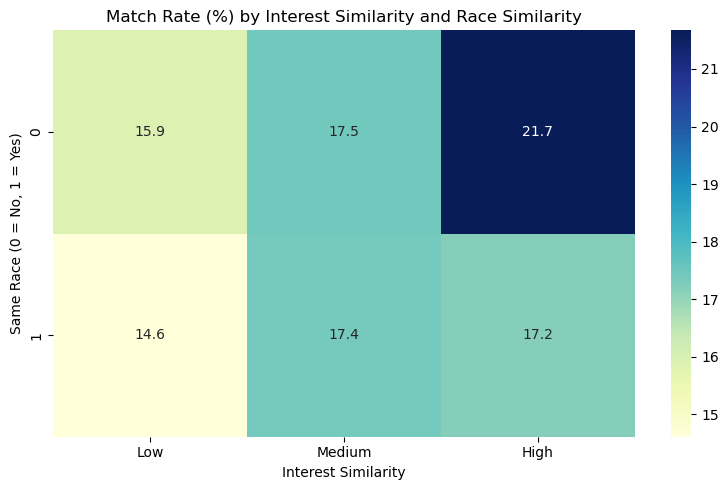

In [253]:
# Step 2: Group by race similarity and interest correlation level, then calculate match rate
heatmap_data = df.groupby(['samerace', 'int_corr_level'])['match'].mean().unstack() * 100
# Step 3: Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Match Rate (%) by Interest Similarity and Race Similarity")
plt.xlabel("Interest Similarity")
plt.ylabel("Same Race (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

The highest match rate is observed when interest similarity is high, even when the participants are from different races (samerace = 0).  
This suggests that shared interests play a more important role in forming a connection than racial similarity.

📌 6. Going Out and Social Behaviors

In [254]:
df = df[df['go_out'] != 7]

df.groupby('go_out')['match'].mean() * 100


go_out
Once a week             14.914552
Several times a week    19.421649
Several times a year    12.213740
Twice a month           12.844037
Twice a week            15.873016
Name: match, dtype: float64

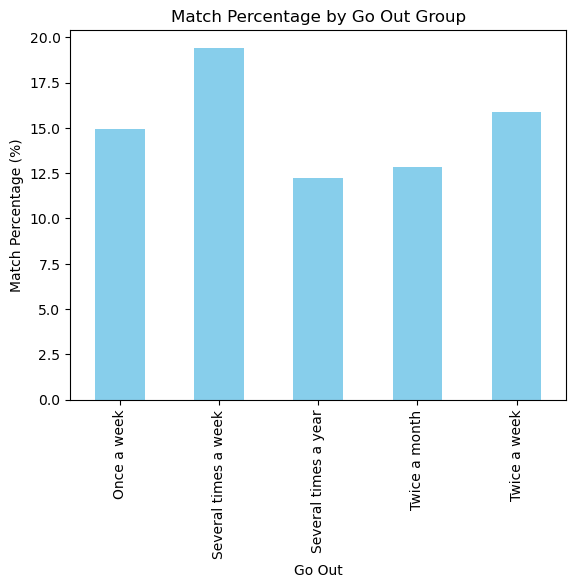

In [255]:
result = df.groupby('go_out')['match'].mean() * 100

# Plotting the results
result.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Go Out')
plt.ylabel('Match Percentage (%)')
plt.title('Match Percentage by Go Out Group')

# Display the plot
plt.show()


People who go out more often (especially several times a week) seem to have a higher match score

In [256]:
df = df[df['date'] != 0.0]
df.groupby('date')['match'].mean() * 100


date
Almost never            14.952589
Once a week             20.522876
Several times a week    30.851064
Several times a year    14.741259
Twice a month           17.795353
Twice a week            21.122112
Name: match, dtype: float64

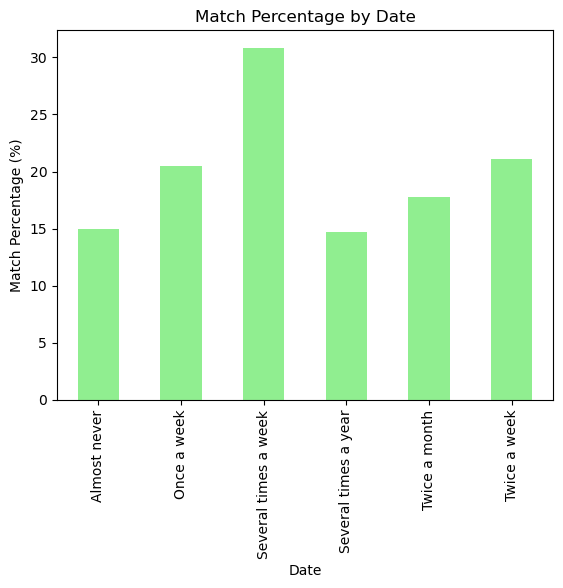

In [257]:
result_date = df[df['date'] != 0.0].groupby('date')['match'].mean() * 100

# Plotting the results
result_date.plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Match Percentage (%)')
plt.title('Match Percentage by Date')

# Display the plot
plt.show()

The result shows the average match percentage for each "go_out" frequency category. People who go out "Several times a week" have the highest match percentage (30.85%), while those who go out "Almost never" or "Several times a year" have the lowest (around 14.95% and 14.74%, respectively)

📌 7. Activities and Hobbies Preferences

In [258]:
# 🔹 Step 1: Define activity columns
activity_cols = [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
    'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
    'shopping', 'yoga'
]

# 🔹 Step 2: Drop rows with missing activity data
activity_df = df.dropna(subset=activity_cols)

# 🔹 Step 3: Average rating for each activity (overall)
avg_activity = activity_df[activity_cols].mean().sort_values(ascending=False)

In [259]:
# 🔹 Step 5: Compare average activities for matched vs unmatched
match_activity = df.groupby('match')[activity_cols].mean().T
match_activity.columns = ['No Match', 'Match']  # match=0, match=1

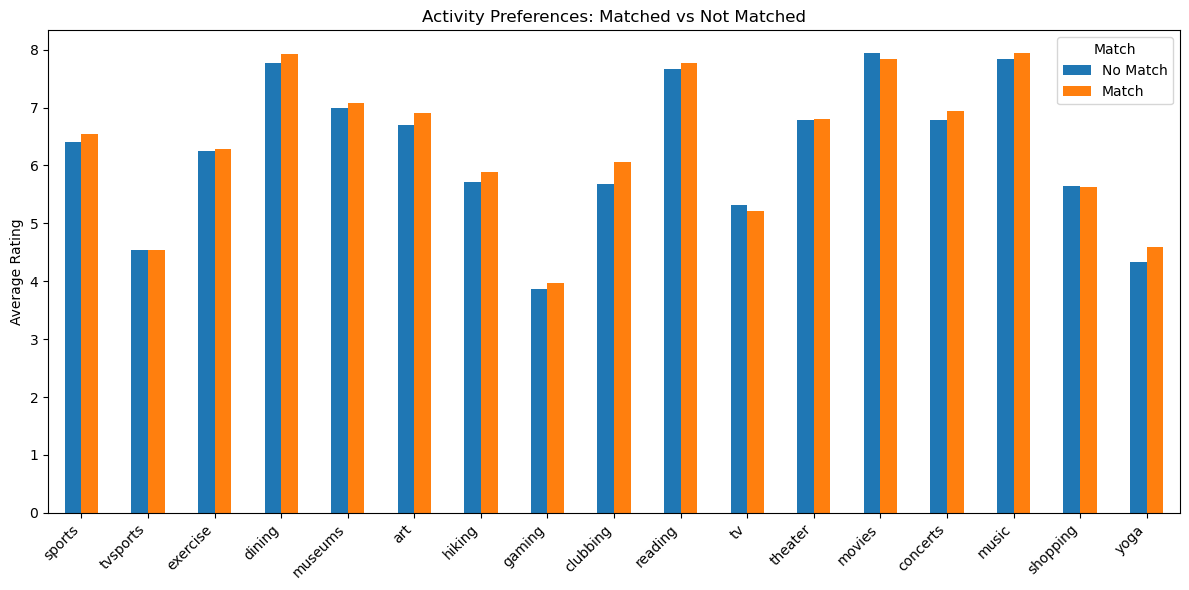

In [260]:
# 🔹 Step 6: Plot side-by-side comparison
match_activity.plot(kind='bar', figsize=(12, 6))
plt.title("Activity Preferences: Matched vs Not Matched")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Match")
plt.tight_layout()
plt.show()

Hobby ratings alone do not meaningfully predict a mutual match; other factors (e.g., conversational chemistry, attractiveness, shared interests discovered during the date) seem far more influential.

📌 8.Is it better to be someone’s first speed-date of the night, or their last?

Each 4-minute conversation has an `order` column (1 = first person you met that evening, 2 = second, …).  
We compute the **match rate** for every order position and visualise the trend.

In [266]:
#Step 1 – Build order_stats (aggregate table)

order_stats = (
    df.groupby('order')['match']           # group all rows by the “order” column
      .agg(match_rate=lambda x: x.mean() * 100,   # % of matches in that order
           count='size')                          # how many dates in that order
      .reset_index()                              # turn the index back into a column
)
print(order_stats.to_string(index=False))      # console print



 order  match_rate  count
     1   23.396226    530
     2   15.122873    529
     3   16.792453    530
     4   17.580340    529
     5   16.981132    530
     6   16.283525    522
     7   15.555556    495
     8   15.950920    489
     9   20.910973    483
    10   17.724289    457
    11   16.666667    366
    12   12.568306    366
    13   15.573770    366
    14   14.754098    366
    15   13.373860    329
    16   13.758389    298
    17   11.244980    249
    18   15.725806    248
    19   18.181818    176
    20   18.181818    143
    21    6.976744     86
    22   22.727273     44


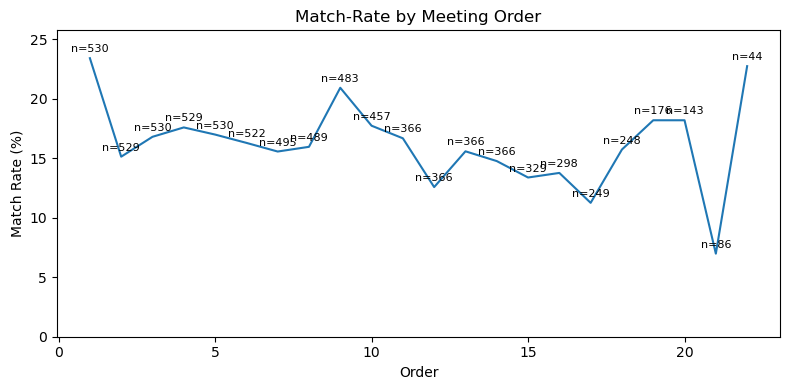

In [272]:
# quick line-plus-dots plot with n= labels
plt.figure(figsize=(8, 4))
ax = sns.lineplot(data=order_stats, x='order', y='match_rate', marker = None)
ax.set(title='Match-Rate by Meeting Order',
       xlabel='Order',
       ylabel='Match Rate (%)',
       ylim=(0, order_stats['match_rate'].max()*1.1))

# add n= text
for r in order_stats.itertuples():
    ax.text(r.order, r.match_rate + 0.5, f'n={r.count}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()



In [273]:
rho = order_stats['order'].corr(order_stats['match_rate'], method='spearman')
print(f"Spearman ρ = {rho:.3f}")


Spearman ρ = -0.212


The Spearman ρ (rho) = -0.212 means there is a weak negative correlation between the order in which someone is met and their match rate.

#Explanation

Order 1 (first person met):

Match Rate: ~23.4%

Sample size (n): 530 participants
This is the highest success rate — first impressions seem to matter most.

Orders 2 to 17 (middle of the evening):

Match Rate: Ranges from 13% to 18%

Sample sizes: Between 300 and 530 participants per position
Pretty stable. No strong pattern — whether you're met early or mid-evening, the odds are about the same.

Order 21 (last date):

Match Rate: ~25% (seems high)

Sample size (n): Only 44 participants
This spike is likely not reliable — too few data points to trust.

Conclusion:
It’s slightly better to go first, but otherwise, the order doesn’t have a big effect on your chance of matching.

📌 Conclusion: 

Participants say they value attractiveness the most, especially men. However, what actually leads to a match includes:

Shared interests

Being fun and sincere

Attractiveness still plays a role, but not as much as participants think.

People often overestimate how attractive they are perceived by others, suggesting a gap in self-perception.

Shared racial background has less impact on match rates than interest similarity, indicating compatibility is more behavioral than demographic.

Being seen early or late in the evening does not strongly influence the chance of being matched — it’s more about connection than timing.

Going out more often and having certain social hobbies can slightly increase match likelihood, but results are not strong enough to generalize.

## Project 🚧

The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**. 

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

The heatmap highlights that the highest correlation between career and interest is observed in the "Banking/Finance/Business" and "Academic/Research" categories, as shown by the darker shades

## Goals 🎯

Use the dataset to understand what makes people interested into each other to go on a second date together:
* You may use descriptive statistics
* You may use visualisations

## Scope of this project 🖼️

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

[Dataset](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv)

[Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help youbest destinations on a map
§yy
Data Exploration Ideas :
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Are shared interests more important than a shared racial background?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

## Deliverable 📬

To complete this project, your team should deliver:

A notebook with:
* descriptive statistics
* visualisations
* captions and interpretations on how the stats and visualisations are relevant to why people agree to a second date